## Реализуем аналитическое решение задачи лин. регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Легко находим формулу для решения нашей задачи в [интернете](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%28%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%29):
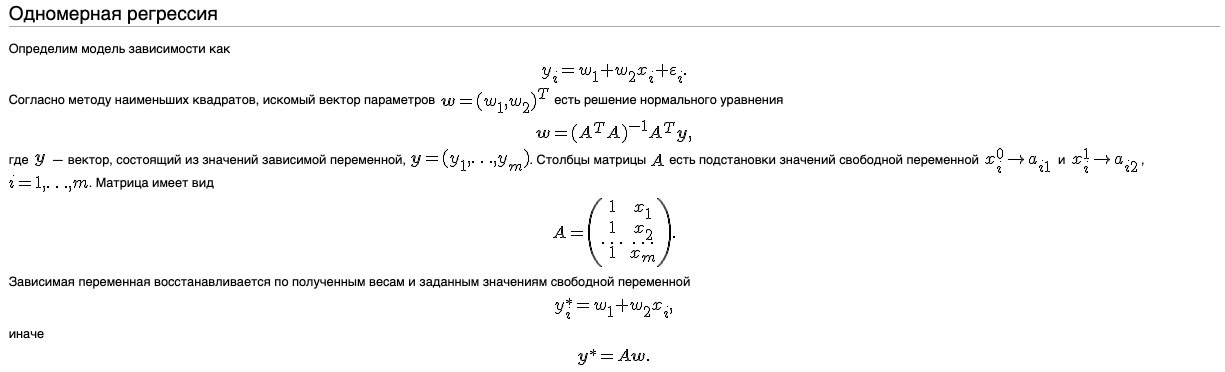

## Давайте построим такую функцию:
- принимает на вход матрицу признаков X (любого размера) - в обозначениях выше это A без первого столбца
- также принимает на вход вектор значений y
- умножает вектор y на соответствующие матрицы
- возвращает вектор $\omega$

## Сначала научимся добавлять столбец из единиц в начало матрицы

In [2]:
X = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
new_column = np.ones((X.shape[0],1))
A = np.c_[new_column, X]
A

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.],
       [1., 7., 8., 9.]])

## Превратим это действие в <font color=green> функцию</font>!

In [3]:
def add_ones(X):
    new_column = np.ones((X.shape[0],1)) # np.ones создает массив из единиц указанной формы
    A = np.c_[new_column, X]
    
    return A

print(add_ones(X*2)) # проверяем, что всё правильно работает

[[ 1.  2.  4.  6.]
 [ 1.  8. 10. 12.]
 [ 1. 14. 16. 18.]]


## Теперь реализуем решение линейной регрессии

In [4]:
def lin_regr(X, y):
    
    # расширим матрицу X дополнительным столбцом из 1
    A = add_ones(X)
    
    # выполняем все действия по порядку
    B = np.matmul(A.T, A)
    B = np.linalg.inv(B)
    B = np.matmul(B, A.T)
    w = np.dot(B, y)
    
    return w
    

## Тестируем на понятном случае y = 2x+1

In [5]:
X = np.linspace(-10,10, 100)
X = X.reshape(100,1) # на первом месте можно было написать не "100", а "-1"
y = 2*X + 1

print('Что предлагает линейная регрессия: ')
print(lin_regr(X,y))


Что предлагает линейная регрессия: 
[[1.]
 [2.]]


## Добавим небольшой случайный шум

Что предлагает линейная регрессия: 
[[13.05195089]
 [ 2.15661845]]


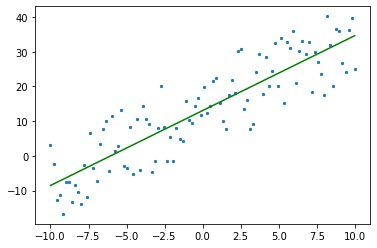

In [6]:
eps = 25*np.random.rand(100).reshape(100,1) # создаем вектор-строку с шумом и превращаем её в вектор-столбец

y = 2*X+1+eps

print('Что предлагает линейная регрессия: ')
w=lin_regr(X,y)
print(w)

plt.scatter(X,y,s=5)
plt.plot(X, X*w[1]+w[0],color='green')

## Случай нелинейных данных

Что предлагает линейная регрессия: 
[[93.90621203]
 [-0.12359813]]


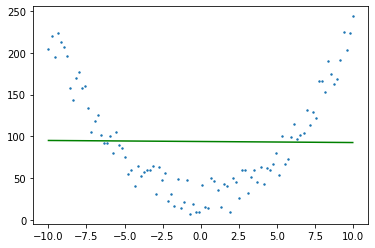

In [7]:
eps = 50*np.random.rand(100).reshape(100,1) # создаем вектор-строку с шумом и превращаем в вектор-столбец

y = 2*X**2+1+eps

print('Что предлагает линейная регрессия: ')
w=lin_regr(X,y)
print(w)

plt.scatter(X,y,s=2)
plt.plot(X, X*w[1]+w[0],color='green')

## Давайте попробуем добавить новый признак: $X^{2}$

Что предлагает линейная регрессия: 
[[25.31154635]
 [-0.12359813]
 [ 2.01709066]]


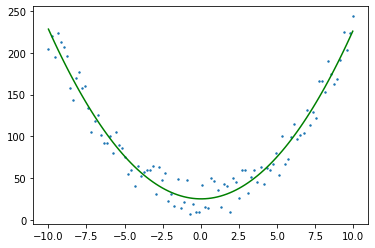

In [8]:
new_X = np.c_[X,X**2] # добавили новый столбец

print('Что предлагает линейная регрессия: ')
w=lin_regr(new_X,y)
print(w)

plt.scatter(X,y,s=2)
plt.plot(X, w[0]+new_X[:,0]*w[1]+new_X[:,1]*w[2],color='green')

## Теперь решим эту же задачу с помощью библиотеки <font color=blue> scikit-learn </font>

/Users/gordon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5102e-36): result may not be accurate.
  overwrite_a=True).T


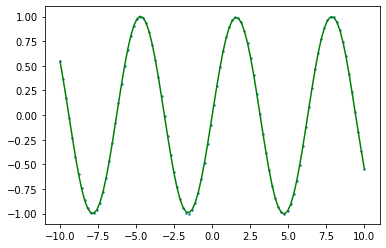

In [18]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

y = np.sin(X) # попробуем приблизить sin(x) полиномами

new_features = PolynomialFeatures(17) # дополнительные полиномиальные признаки
X_poly = new_features.fit_transform(X)

#print(super_new_X[:5])

model = Ridge(alpha=0.1)#LinearRegression()
model.fit(X_poly,y) # обучаем модель (находим коэффициенты w)
y_pred = model.predict(X_poly) # получаем вектор предсказаний модели

plt.scatter(X, y, s=2)
plt.plot(X, y_pred, color='green')